# Predictive Modelling Competition

This was a team project that I did with the help of my teammates Mark Owen and Felix Wilfried. 

For this group project, we used the Bird Species dataset from Kaggle to test our skills in image classification.


## Things to keep in mind:
- Make sure that your Training, Testing AND Validation sets contain the same classes of species
- Your validation set is to be used at the very end -- to get a good sense of how your model is performing
- You are expected to compile a CNN in order to correctly classify your selected 15 classes
- Google Colab is your friend - it can help boost your model's training time 
- It can be beneficial to reshape some of the images to reduce some of the data - this will help speed up your model's training time
- Do some research to find out ways to help boost your model's performance (ie data augmentation)
- Make sure to save your model and during the presentation you will load your model and evaluate its performance on the validation set
- Good Luck! 

In [1]:
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten
from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import skimage
import seaborn as sns
import PIL
from PIL import Image

In [2]:

# Set the path to the dataset directory
dataset_path = 'data'

# Define the list of bird species
bird_species = ['albatross', 'alexandrine parakeet', 'american avocet', 'american goldfinch', 'american kestrel',
                'american redstart', 'anhinga', 'annas hummingbird', 'antbird', 'araripe manakin',
                'ashy storm petrel', 'bald eagle', 'baltimore oriole', 'bananaquit', 'bar-tailed godwit']

# Resize images to a common size
# image_size = (224, 224)

bird_labels = {}
for species_idx, species_name in enumerate(bird_species):
    bird_labels[species_idx]=species_name
    
image_size = 224.0

In [3]:
def load_dataset(data_type):
    temp_data = list()
    for species_idx, species_name in enumerate(bird_species):
        species_folder = os.path.join(dataset_path,data_type, species_name)
        for image_file in os.listdir(species_folder):
            image_path = os.path.join(species_folder, image_file)
            img = skimage.io.imread(image_path, as_gray=False,)
            img = img / 255.0
            img = skimage.transform.resize(img, (image_size, image_size))            
#             skimage.io.imshow(img)
#             skimage.io.show()
#             break
            temp_data.append([img, species_idx])
#         break
    return temp_data

# Prepare the dataset
test_data = load_dataset("test")
training_data = load_dataset("train")
valid_data = load_dataset("valid")


In [4]:
# Generating out training and testing sets

print("Training data shape: {}".format(np.shape(test_data)))
print("Training data length: {}".format(len(test_data)))

print("Training data shape: {}".format(np.shape(training_data)))
print("Training data length: {}".format(len(training_data)))

print("Validation data shape: {}".format(np.shape(valid_data)))
print("Validation data length: {}".format(len(valid_data)))

Training data shape: (75, 2)
Training data length: 75
Training data shape: (2315, 2)
Training data length: 2315
Validation data shape: (75, 2)
Validation data length: 75


D:\Program_files\anaconda3\envs\tensorflowgpu\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [5]:
# Shuffling our data around 

train_data = shuffle(training_data)
test_data = shuffle(test_data)
valid_data = shuffle(valid_data)

for item in train_data[:5]:
    print(item[1])

print()
    
for item in test_data[:5]:
    print(item[1])

1
2
13
6
9

2
6
10
3
10


In [6]:
# Splitting up our X and y for both training and testing sets

X_train = list()
y_train = list()
X_test = list()
y_test = list()
X_valid = list()
y_valid = list()

for attr, lbl in train_data:
    X_train.append(attr)
    y_train.append(lbl)
X_train = np.array(X_train)
y_train = np.array(y_train)

for attr, lbl in test_data:
    X_test.append(attr)
    y_test.append(lbl)
X_test = np.array(X_test)
y_test = np.array(y_test)

for attr, lbl in valid_data:
    X_valid.append(attr)
    y_valid.append(lbl)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

(<Axes: >, <matplotlib.image.AxesImage at 0x1de163f8eb0>)

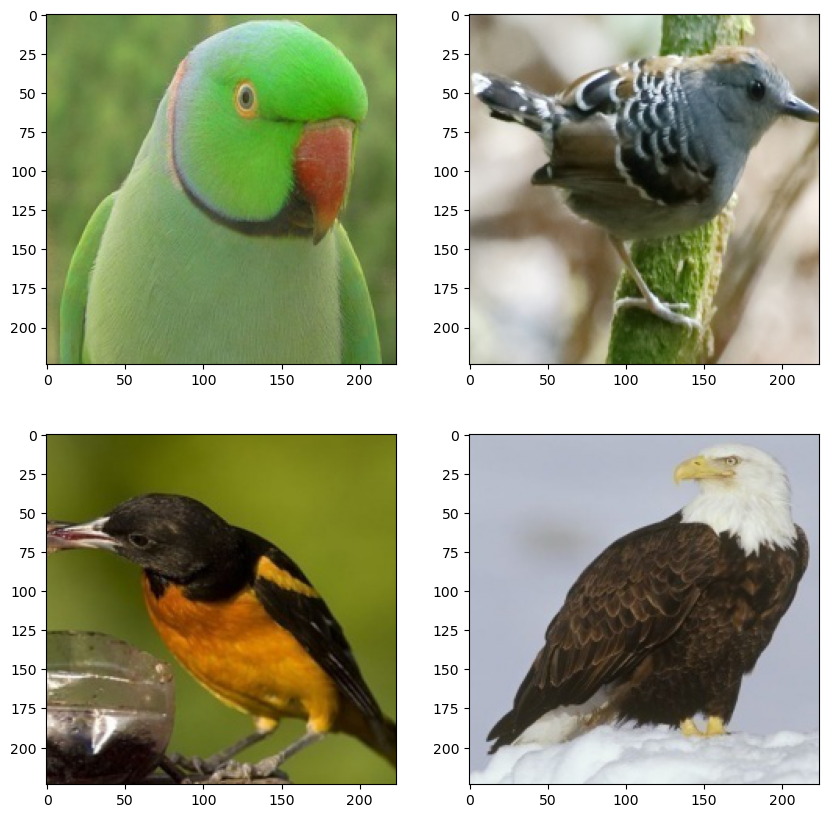

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(X_train[0])
plt.subplot(222), plt.imshow(X_train[25])
plt.subplot(223), plt.imshow(X_train[50])
plt.subplot(224), plt.imshow(X_train[74])

In [8]:
# Verifying the shape of our data

print("Shape of X: {}".format(np.shape(X_train)))

Shape of X: (2315, 224, 224, 3)


In [9]:
# converting train images into tensor

X_train = tf.convert_to_tensor(X_train)

y_train = tf.convert_to_tensor(y_train)

X_train.shape, y_train.shape

(TensorShape([2315, 224, 224, 3]), TensorShape([2315]))

In [10]:
# converting test images into tensor

X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

X_test.shape, y_test.shape

(TensorShape([75, 224, 224, 3]), TensorShape([75]))

In [11]:
# keras tuner
# hyper parameter tuning

# conv net architechture 
# (u net segmentation)
# image net CNN

In [12]:
# tried to implement grid search here, did not really give good results. Manual exploration had better results. 
"""
def create_model(num_hidden_layers):       
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    for _ in range(num_hidden_layers):
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
#     model.add(Dense(512, activation='relu'))
    model.add(Dense(15, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'num_hidden_layers': [1, 2, 3, 4, 5],  # Modify the range as per your requirements
    'epochs': [10, 20, 30]
}

# Perform the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print the best results
print("Best number of hidden layers:", grid_result.best_params_['num_hidden_layers'])
print("Best accuracy:", grid_result.best_score_)
"""

# Best number of hidden layers: 4
# Best accuracy: 0.7170593539873759
# took about 20 mins to run on my machine

'\ndef create_model(num_hidden_layers):       \n    model = Sequential()\n    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation=\'relu\'))\n    model.add(MaxPooling2D((2, 2)))\n\n    for _ in range(num_hidden_layers):\n        model.add(Conv2D(64, (3, 3), activation=\'relu\'))\n        model.add(MaxPooling2D((2, 2)))\n\n    model.add(Flatten())\n    model.add(Dense(32, activation=\'relu\'))\n#     model.add(Dense(512, activation=\'relu\'))\n    model.add(Dense(15, activation=\'softmax\'))\n\n    model.compile(optimizer=\'adam\', loss=\'sparse_categorical_crossentropy\', metrics=[\'accuracy\'])\n    return model\n\n# Create the KerasClassifier wrapper\nmodel = KerasClassifier(build_fn=create_model, verbose=0)\n\n# Define the grid search parameters\nparam_grid = {\n    \'num_hidden_layers\': [1, 2, 3, 4, 5],  # Modify the range as per your requirements\n    \'epochs\': [10, 20, 30]\n}\n\n# Perform the grid search\ngrid_search = GridSearchCV(estimator=model, param_grid=pa

In [13]:
# Building our model!

#changing the hidden layers, dramatically changes the performance of the model. 
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1024, activation='relu'))

model.add(Dense(15, activation='softmax'))


In [14]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
# Compiling our model
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Summary - overview of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

In [17]:
# with data augmentation, we had to change the parameters of the model, but we were able to get 
# much better results, with many more epochs for training. 
# also much slower to train. took 2-3 hours. 
datagen.fit(X_train)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=200, validation_data=(X_test, y_test))

Epoch 1/200


D:\Program_files\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


73/73 [==============================] - 18s 178ms/step - loss: 2.5409 - accuracy: 0.1266 - val_loss: 2.2988 - val_accuracy: 0.1733
Epoch 2/200
73/73 [==============================] - 13s 177ms/step - loss: 2.2758 - accuracy: 0.2030 - val_loss: 2.0673 - val_accuracy: 0.2267
Epoch 3/200
73/73 [==============================] - 13s 178ms/step - loss: 2.1195 - accuracy: 0.2674 - val_loss: 1.7304 - val_accuracy: 0.3467
Epoch 4/200
73/73 [==============================] - 13s 177ms/step - loss: 1.8825 - accuracy: 0.3555 - val_loss: 1.4812 - val_accuracy: 0.4800
Epoch 5/200
73/73 [==============================] - 13s 179ms/step - loss: 1.6677 - accuracy: 0.4251 - val_loss: 1.1272 - val_accuracy: 0.6000
Epoch 6/200
73/73 [==============================] - 13s 176ms/step - loss: 1.5570 - accuracy: 0.4760 - val_loss: 1.1028 - val_accuracy: 0.6667
Epoch 7/200
73/73 [==============================] - 13s 179ms/step - loss: 1.4342 - accuracy: 0.5283 - val_loss: 1.0229 - val_accuracy: 0.6533
Epoc

73/73 [==============================] - 43s 585ms/step - loss: 0.2095 - accuracy: 0.9356 - val_loss: 0.3122 - val_accuracy: 0.9067
Epoch 114/200
73/73 [==============================] - 43s 590ms/step - loss: 0.1449 - accuracy: 0.9542 - val_loss: 0.2672 - val_accuracy: 0.9467
Epoch 115/200
73/73 [==============================] - 104s 1s/step - loss: 0.1425 - accuracy: 0.9577 - val_loss: 0.1824 - val_accuracy: 0.9600
Epoch 116/200
73/73 [==============================] - 106s 1s/step - loss: 0.1692 - accuracy: 0.9456 - val_loss: 0.1880 - val_accuracy: 0.9600
Epoch 117/200
73/73 [==============================] - 107s 1s/step - loss: 0.1514 - accuracy: 0.9521 - val_loss: 0.1248 - val_accuracy: 0.9600
Epoch 118/200
73/73 [==============================] - 62s 845ms/step - loss: 0.1975 - accuracy: 0.9395 - val_loss: 0.1427 - val_accuracy: 0.9600
Epoch 119/200
73/73 [==============================] - 64s 877ms/step - loss: 0.1626 - accuracy: 0.9464 - val_loss: 0.1711 - val_accuracy: 0.973

In [17]:
# Load the trained model
model = keras.models.load_model('model.h5') 

In [18]:
# save history of training to pkl
# with open('history.pkl', 'wb') as f:
#     pickle.dump(history.history, f)

In [18]:
# read training history pkl file
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

In [133]:
# Fitting our model on our data
# epochs = 50
# history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=epochs)
# model.fit(X_train, y_train, batch_size=32, validation_split=.1, epochs=epochs)

Epoch 1/50
10/10 [==============================] - 3s 274ms/step - loss: 2.6731 - accuracy: 0.1136 - val_loss: 2.3833 - val_accuracy: 0.2933
Epoch 2/50
10/10 [==============================] - 3s 271ms/step - loss: 2.3606 - accuracy: 0.2419 - val_loss: 2.1334 - val_accuracy: 0.2667
Epoch 3/50
10/10 [==============================] - 3s 270ms/step - loss: 2.0092 - accuracy: 0.3516 - val_loss: 1.5870 - val_accuracy: 0.4933
Epoch 4/50
10/10 [==============================] - 3s 271ms/step - loss: 1.6655 - accuracy: 0.4721 - val_loss: 1.5297 - val_accuracy: 0.5200
Epoch 5/50
10/10 [==============================] - 3s 271ms/step - loss: 1.7515 - accuracy: 0.4380 - val_loss: 1.4368 - val_accuracy: 0.5600
Epoch 6/50
10/10 [==============================] - 3s 275ms/step - loss: 1.4968 - accuracy: 0.5361 - val_loss: 1.1252 - val_accuracy: 0.5600
Epoch 7/50
10/10 [==============================] - 3s 269ms/step - loss: 1.3242 - accuracy: 0.5780 - val_loss: 1.1158 - val_accuracy: 0.6267
Epoch 

In [19]:
# Evaluating our model

score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

D:\Program_files\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Test loss: 0.12451832741498947
Test accuracy: 0.9599999785423279


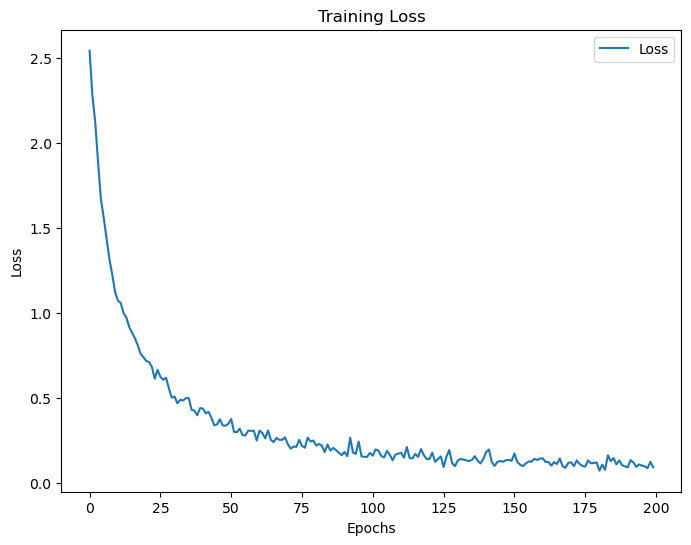

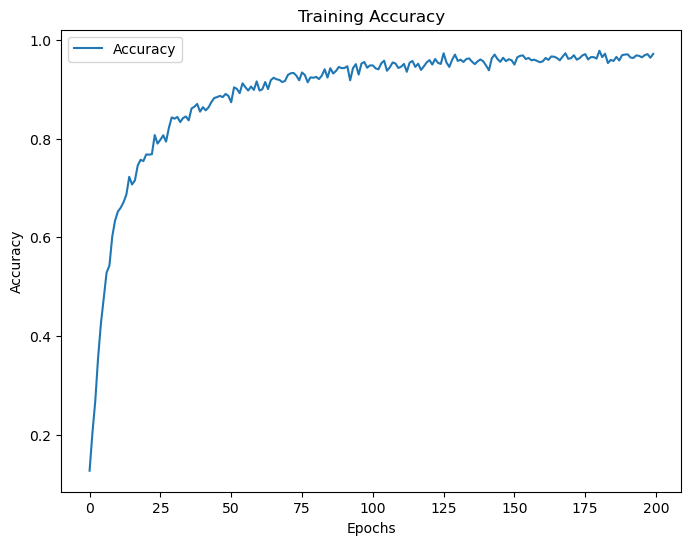

In [21]:
# Access the loss and accuracy values from the training history
loss_history = history['loss']
accuracy_history = history['accuracy']

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(loss_history, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(accuracy_history, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

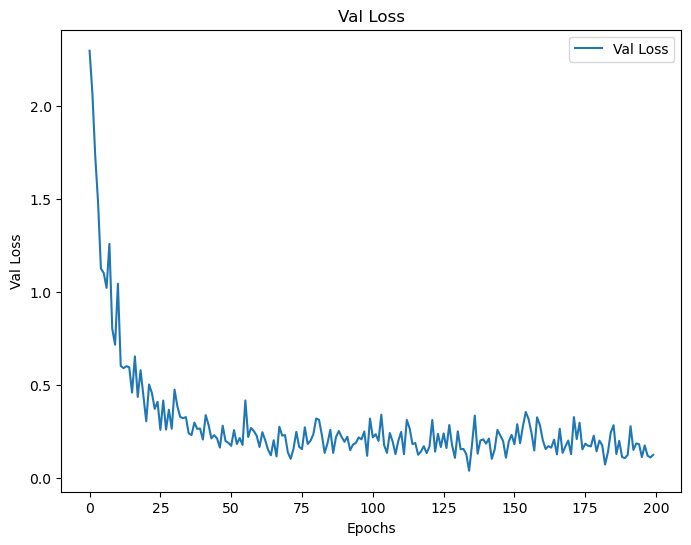

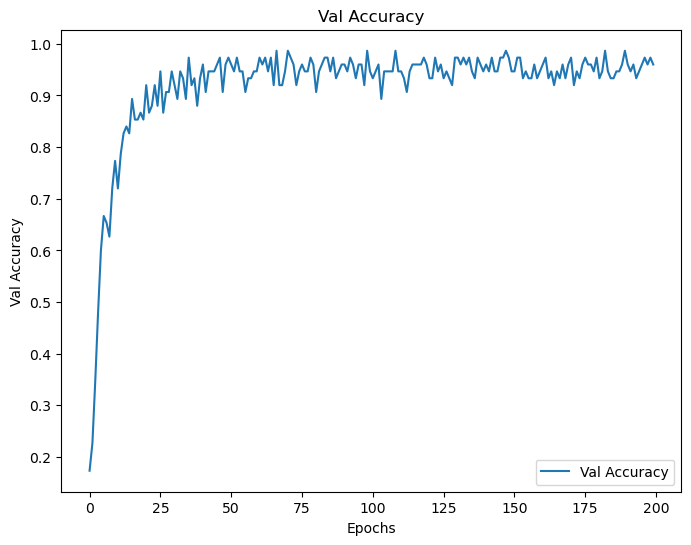

In [22]:
# Access the loss and accuracy values from the training history
loss_history = history['val_loss']
accuracy_history = history['val_accuracy']

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(loss_history, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.title('Val Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(accuracy_history, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.title('Val Accuracy')
plt.legend()
plt.show()

In [22]:
# Obtaining preditions

predictions = model.predict(X_test)
preds = [np.argmax(p) for p in predictions] # Grab the class with highest probability 

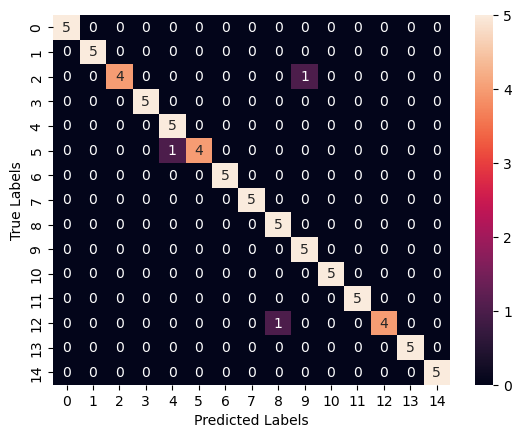

In [23]:
# Visualize our model's true labels vs preds

sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [24]:
# Classification report -> evaluation metrics for our model 

print(classification_report(y_test,preds,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000         5
           2      1.000     0.800     0.889         5
           3      1.000     1.000     1.000         5
           4      0.833     1.000     0.909         5
           5      1.000     0.800     0.889         5
           6      1.000     1.000     1.000         5
           7      1.000     1.000     1.000         5
           8      0.833     1.000     0.909         5
           9      0.833     1.000     0.909         5
          10      1.000     1.000     1.000         5
          11      1.000     1.000     1.000         5
          12      1.000     0.800     0.889         5
          13      1.000     1.000     1.000         5
          14      1.000     1.000     1.000         5

    accuracy                          0.960        75
   macro avg      0.967     0.960     0.960        75
weighted avg      0.967   

In [26]:
model.save("model.h5")

1. albatross
2. alexandrine parakeet
3. american avocet
4. american goldfinch
5. american kestrel
6. american redstart
7. anhinga
8. annas hummingbird
9. antbird
10. araripe manakin
11. ashy storm petrel
12. bald eagle
13. baltimore oriole
14. bananaquit
15. bar-tailed godwit


In [27]:
# Preprocess the image
image_path = 'data/valid/araripe manakin/2.jpg'  # Replace with the actual path to your image
image_size = (224, 224)  # The size of the input images for your model

image = Image.open(image_path).resize(image_size)
image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension if needed

# Load the trained model
model = keras.models.load_model('model.h5')  # Replace with the path to your trained model
# model = keras.models.load_model('./data/EfficientNetB0-525-(224 X 224)- 98.97.h5')  # Replace with the path to your trained model

# Make predictions
predictions = model.predict(image_array)
predicted_label = np.argmax(predictions)

# Print the predicted label
print("Predicted label:", predicted_label,"bird",bird_labels[predicted_label])


Predicted label: 9 bird araripe manakin
